In [ ]:
#Project
#3
#DECISION CLASSIFIER
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree

In [ ]:
df=pd.read_csv("/content/project_loan.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Status
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21342,6AA97LNLMX,68.0,76912.0,31323.0,794.0,115.0,1.0,8.05,36.0,0.50,Bachelor's,Part-time,Married,Yes,No,Auto,Yes,0.0
21343,4B5MYR7BKK,41.0,23926.0,226528.0,478.0,42.0,2.0,3.60,36.0,0.84,PhD,Self-employed,Divorced,Yes,Yes,Education,No,0.0
21344,P8SNZHR0LF,46.0,64871.0,158640.0,590.0,70.0,1.0,2.18,12.0,0.16,Bachelor's,Part-time,Married,No,Yes,Business,Yes,0.0
21345,WHP5JBLBA4,22.0,105266.0,205044.0,747.0,1.0,3.0,21.39,48.0,0.90,PhD,Part-time,Single,No,Yes,Home,No,1.0


In [ ]:
feature_cols=['Income','LoanAmount','MonthsEmployed','DTIRatio']
features=df.loc[0:99,feature_cols]
Target=df.loc[0:99,'Status']  #target variable
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Status
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21342,6AA97LNLMX,68.0,76912.0,31323.0,794.0,115.0,1.0,8.05,36.0,0.50,Bachelor's,Part-time,Married,Yes,No,Auto,Yes,0.0
21343,4B5MYR7BKK,41.0,23926.0,226528.0,478.0,42.0,2.0,3.60,36.0,0.84,PhD,Self-employed,Divorced,Yes,Yes,Education,No,0.0
21344,P8SNZHR0LF,46.0,64871.0,158640.0,590.0,70.0,1.0,2.18,12.0,0.16,Bachelor's,Part-time,Married,No,Yes,Business,Yes,0.0
21345,WHP5JBLBA4,22.0,105266.0,205044.0,747.0,1.0,3.0,21.39,48.0,0.90,PhD,Part-time,Single,No,Yes,Home,No,1.0


In [ ]:
#create the model
from sklearn.linear_model import LinearRegression
model=DecisionTreeClassifier()
#train the model
model.fit(features,Target)

DecisionTreeClassifier()

In [ ]:
pre=model.predict([[85994,50587,80.0,0.44]])
pre1=model.predict([[84208,129188,26,0.31]])
print(pre)
print(pre1)

[0.]
[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#'Income','LoanAmount','MonthsEmployed','DTIRatio'
p1=int(input("enter your income:" ))
p2=int(input("enter your LoanAmount:"))
p3=float(input("enter MonthsEmployed :"))
p4=float(input("enter DITRatio :"))
pre=model.predict([[p1,p2,p3,p4]])
if pre==1:
  print("Congrats! you will get loan")
else:
  print("Sorry you dont get loan")

enter your income:85994
enter your LoanAmount:50587
enter MonthsEmployed :80.0
enter DITRatio :0.44
Sorry you dont get loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5330882352941176, 0.9583333333333334, 'x[2] <= 115.5\ngini = 0.241\nsamples = 100\nvalue = [86, 14]'),
 Text(0.41544117647058826, 0.875, 'x[1] <= 76434.5\ngini = 0.219\nsamples = 96\nvalue = [84, 12]'),
 Text(0.35661764705882354, 0.7916666666666666, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.4742647058823529, 0.7916666666666666, 'x[3] <= 0.79\ngini = 0.284\nsamples = 70\nvalue = [58, 12]'),
 Text(0.2867647058823529, 0.7083333333333334, 'x[3] <= 0.125\ngini = 0.242\nsamples = 64\nvalue = [55, 9]'),
 Text(0.22794117647058823, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.34558823529411764, 0.625, 'x[0] <= 25008.0\ngini = 0.222\nsamples = 63\nvalue = [55, 8]'),
 Text(0.14705882352941177, 0.5416666666666666, 'x[1] <= 166095.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.08823529411764706, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.20588235294117646, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5

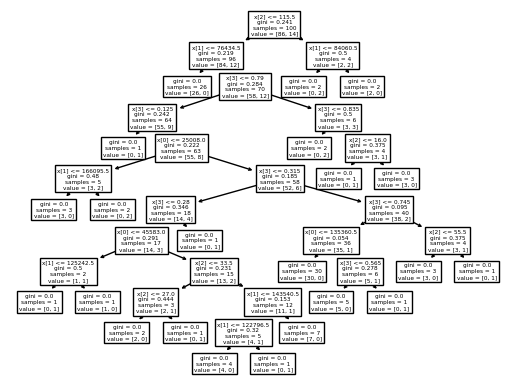

In [ ]:
plot_tree(model)

Random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df1=pd.read_csv("/content/project_loan.csv")
df1

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Status
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42688,S9RP0KW5FC,49,78284,102644,647,6,3,15.08,48,0.43,High School,Self-employed,Divorced,Yes,Yes,Auto,No,0.0
42689,B4BS1LFD8T,26,68869,72616,505,72,3,13.82,48,0.26,High School,Self-employed,Single,Yes,Yes,Education,Yes,0.0
42690,L3MAJRM39Q,39,84860,124150,779,114,1,11.73,36,0.85,High School,Unemployed,Married,Yes,No,Business,Yes,0.0
42691,4MC9RUD9M1,27,93690,93023,601,54,3,18.33,60,0.41,PhD,Unemployed,Divorced,Yes,No,Education,No,0.0


In [ ]:
feature_cols1=['Income','LoanAmount','MonthsEmployed','DTIRatio']
features1=df1.loc[0:99,feature_cols1]    #features=df.loc[0:99,feature_cols]
Target=df1.loc[0:99,'Status']  #target variable

In [ ]:
#create the model
#from sklearn.linear_model import LinearRegression
DT=RandomForestClassifier(n_estimators=10)
#train the model
DT.fit(features1,Target)

RandomForestClassifier(n_estimators=10)

In [ ]:
pre2=DT.predict([[85994,50587,80.0,0.44]])
pre3=DT.predict([[84208,129188,26,0.31]])
print(pre2)
print(pre3)

[0.]
[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#'Income','LoanAmount','MonthsEmployed','DTIRatio'
p1=int(input("enter your income:" ))
p2=int(input("enter your LoanAmount:"))
p3=float(input("enter MonthsEmployed :"))
p4=float(input("enter DITRatio :"))
pre=DT.predict([[p1,p2,p3,p4]])
if pre==1:
  print("Congrats! you will get loan")
else:
  print("Sorry you dont get loan")

enter your income:84208
enter your LoanAmount:129188
enter MonthsEmployed :26
enter DITRatio :0.31
Congrats! you will get loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import os
output_dir="tree_visualizations"
os.makedirs(output_dir,exist_ok=True)

In [ ]:
for i,tree in enumerate(DT.estimators_):
  tree_dot_file = os.path.join(output_dir,f"tree_{i}.dot")
  tree_png_file = os.path.join(output_dir,f"tree_{i}.png")

In [ ]:
DT.estimators_  #model  name=DT

[DecisionTreeClassifier(max_features='sqrt', random_state=56689117),
 DecisionTreeClassifier(max_features='sqrt', random_state=962054272),
 DecisionTreeClassifier(max_features='sqrt', random_state=13767395),
 DecisionTreeClassifier(max_features='sqrt', random_state=233956656),
 DecisionTreeClassifier(max_features='sqrt', random_state=1437284710),
 DecisionTreeClassifier(max_features='sqrt', random_state=304252403),
 DecisionTreeClassifier(max_features='sqrt', random_state=962225469),
 DecisionTreeClassifier(max_features='sqrt', random_state=861195562),
 DecisionTreeClassifier(max_features='sqrt', random_state=310255006),
 DecisionTreeClassifier(max_features='sqrt', random_state=1558681801)]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file, feature_names=['Income','LoanAmount','MonthsEmployed','DTIRatio'],
                    class_names=[str(cls) for cls in DT.classes_], filled=True, rounded=True)

In [ ]:
command = f"dot -Tpng {tree_dot_file} -o {tree_png_file}"
os.system(command)
print(f"Tree {i} visualization saved to {tree_png_file}")

Tree 9 visualization saved to tree_visualizations/tree_9.png


STATE PROJECT

<ipython-input-40-c9ac1748ef73>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/data.csv",encoding='latin')


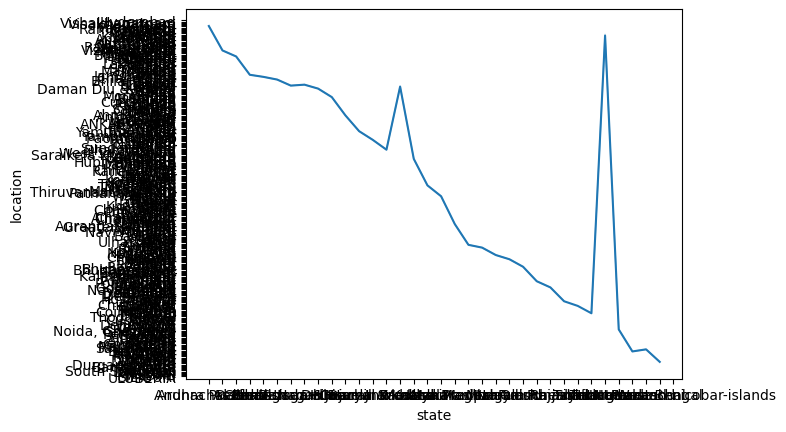

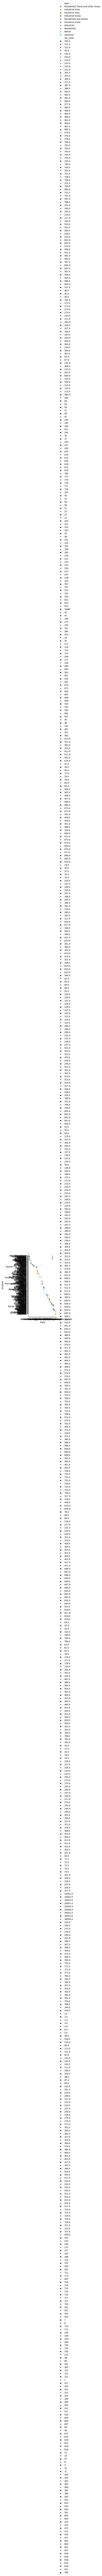

In [ ]:
import pandas as pd

import seaborn as sns


df=pd.read_csv("/content/data.csv",encoding='latin')
df

state='Tamil Nadu'
location='Palakollu'
p1=sns.lineplot(x='state',y='location',data=df)



sns.relplot(data=df,x="state",y="location",hue="type",style="stn_code")

<ipython-input-45-222a4779a628>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/data.csv",encoding='latin')


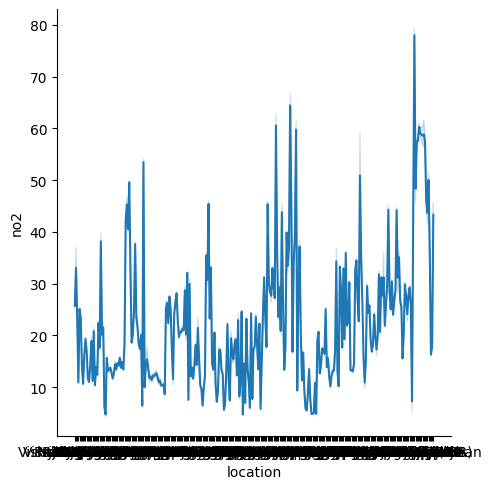

In [ ]:
import seaborn as sns


df=pd.read_csv("/content/data.csv",encoding='latin')
df

state='Tamil Nadu'
location='Vijayawada'
p1=sns.relplot(x='location',y='no2',data=df,kind='line')

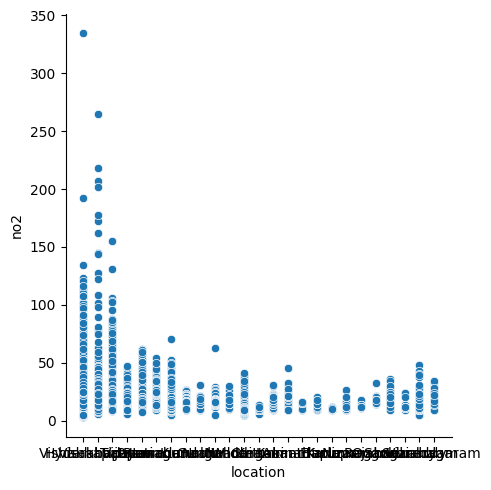

In [ ]:
import pandas as pd
import seaborn as sns


df=pd.read_csv("/content/data.csv", encoding='latin1')
df

state='Tamilnadu'
location='Thoothukudi'
p1=sns.relplot(x='location',y='no2',data=df)

In [6]:
#Profit prediction using LinearRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
model=LinearRegression()
df=pd.read_csv("/content/project_loan.csv")
t=np.array([i for i in df["Income"]]).reshape(-1,1)
p=df["LoanAmount"]
model.fit(t,p)
n=int(input("Enter income:"))
status=(model.predict([[n]]))
#print(status)
if(status==1):
  print("yes")
else:
  print("no")

Enter income:84208
no
